In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [2]:
current_dir = os.getcwdb()
ficheiros = os.listdir()[1]
print(ficheiros)

LeiDeMalus.csv


C:\Users\tixas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """Entry point for launching an IPython kernel.


In [3]:
ficc = pd.read_csv(ficheiros, sep=';')
ficc

,T,Vpp
0,0,"0,0102"
1,10,"0,166"
2,20,"0,616"
3,30,"1,4"
4,40,"2,28"
5,50,"3,12"
6,60,"4,08"
7,70,"4,72"
8,80,"5,24"
9,"90,01","5,4"


In [4]:
Para = ['T','Vpp'] 

def virg(x):
    x=x.replace(',','.')
    return x

for j in range(2):
    ficc[Para[j]]=(ficc[Para[j]].apply(virg)).astype(float)
        

ficc

,T,Vpp
0,0.00,0.0102
1,10.00,0.1660
2,20.00,0.6160
3,30.00,1.4000
4,40.00,2.2800
5,50.00,3.1200
6,60.00,4.0800
7,70.00,4.7200
8,80.00,5.2400
9,90.01,5.4000


+-------------------------------+
|      Parametros de ajuste     |
+-----------+-------+-----------+
| Parametro | valor | incerteza |
+-----------+-------+-----------+
|     m1    |  0.01 |    0.02   |
|     m2    |  5.34 |    0.03   |
|     m3    | 1.579 |   0.003   |
+-----------+-------+-----------+


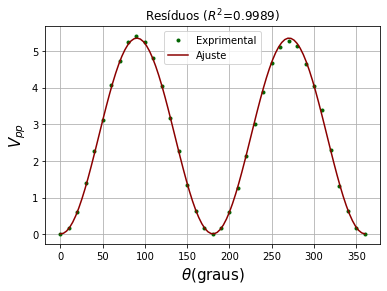

In [24]:
x1=ficc[Para[0]]
y1=ficc[Para[1]]

xerr=np.ones(len(x1))*0.01
yerr=0.0001*np.ones(len(y1))

def f(x,m1,m2,m3):
    return m1+m2* np.cos(x*np.pi/180-m3)**2

def r2calc(ydata,ycalc):
    dy=ydata-ycalc
    ss_res = np.sum(dy**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return  1 - (ss_res / ss_tot)


popt1, pcov1 = curve_fit(f, x1 , y1)
m11,m21,m31 = popt1
em11,em21,em31= np.sqrt(np.diag(pcov1))

xl=np.linspace(0,360,100)

ytl= f(xl,m11,m21,m31)
yt1=f(x1,m11,m21,m31)


# plt.figure(figsize=(12,8))
plt.plot(x1,y1,'.',label='Exprimental',c='darkgreen')
plt.plot(xl,ytl, label='Ajuste',c='darkred')
plt.grid()
plt.xlabel(r'$\theta$(graus)',fontdict={'size':15})
plt.ylabel(r'$V_{pp}$',fontdict={'size':15})
plt.legend()
# plt.axes((.55,.23,.3,.23))
# plt.plot(x1,y1-yt1,'.',ls='',c='b')
# plt.yticks(np.arange(-0.3,0.4,0.1))
# plt.grid(True)
plt.title(r'Resíduos ($R^2$={:.4f})'.format(r2calc(y1,yt1)))

from prettytable import PrettyTable

tab = PrettyTable()  
tab.title = 'Parametros de ajuste'
tab.field_names = ['Parametro',"valor","incerteza"]
tab.add_row(['m1',"%.2f" % (m11) ,"%.2f" % (em11) ])
tab.add_row(['m2',"%.2f" % (m21) ,"%.2f" % (em21) ])
tab.add_row(['m3',"%.3f" % (m31) ,"%.3f" % (em31) ])

print(tab)